# Signifikanz von Trends

## Meereis-Ausdehnung

Populating the interactive namespace from numpy and matplotlib


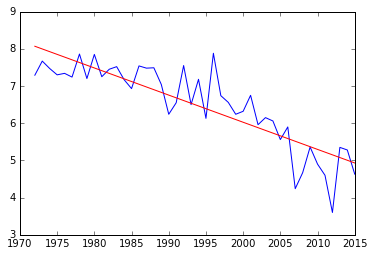

In [32]:
%pylab inline
N=44
t=linspace(1972,1972+N-1,N)
Y=loadtxt("../stunde3/september_extent_1972_2015.txt")[0:N]
plot(t,Y)
p = polyfit(t,Y,1)
y_line=p[0]*t+p[1]
plot(t,y_line,"r")

Y_o=Y.copy()

M=10000
a=zeros(M)
for i in range(M):
    shuffle(Y)
    p = polyfit(t,Y,1)
    a[i]=p[0]


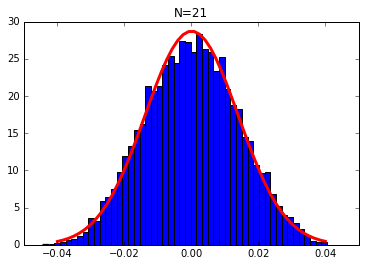

In [13]:
m=mean(a)
s=std(a)
x=linspace(-0.04,0.04)
figure()
h=hist(a,bins=50,normed=True)
y=normpdf(x,m,s)
plot(x,y,'r',linewidth=3)
title('N=21')

In [23]:
p = polyfit(t,Y_o,1)
p

array([ -2.62597403e-02,   5.93529957e+01])

In [15]:
p[0]/s

-1.8902327505001972

In [17]:
import scipy.stats as stats
stats.norm.cdf(-1.89)


0.029378980040409432

Der beobachete Trend liegt -1.89 $\sigma$ vom Nullpunkt der Monte-Carlo-Gesamtheit entfernt. Dies entspricht einer Warscheinlichkeit von etwa 3%, dass es sich um einen rein zufälligen Trend handelt. Die Nullhypothese (kein Trend) wird zurückgewiesen.

## Ab wann ist der Trend signifikant?

Betrachte p-Wert als Funktion der Zeit.

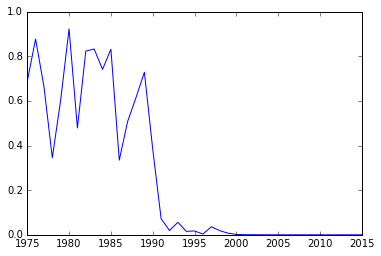

In [30]:
import scipy.stats as stats
M0,M1=3,44
P=zeros(M1)
P[:]=nan
for n in range(M0,M1):
    slope, intercept, r_value, p_value, std_err = stats.linregress(t[0:n],Y_o[0:n])
    P[n]=p_value

plot(t,P)